In [2]:
# This script is written to explore the discriminant analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.decomposition
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA




In [17]:
df = pd.read_csv('morpho_data.csv')
feature_list = list(df.drop("target", axis=1))
X= df.drop("target", axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=23)

scaler=StandardScaler()
scaler.fit(X_train)


# Scaling Train Set
X_train = scaler.transform(X_train)
# Scaling Test Set
X_test = scaler.transform(X_test)


lda_for_classification = LDA(shrinkage=None, solver='svd')
lda_for_classification.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [4]:
# Calling LDA
lda_as_dimension_reduction = LDA(n_components=2)
X_lda_sklearn = lda_as_dimension_reduction.fit_transform(X, y)

print('(Rows,Columns) of the original data is ',X.shape)
print('\n After LDA Dimension Reductionn we have', X_lda_sklearn.shape)

(Rows,Columns) of the original data is  (528, 36)

 After LDA Dimension Reductionn we have (528, 2)


In [5]:
## Explaning the varianvce for the new features created

print('Variance explained:\n')
for i,j in enumerate(lda_as_dimension_reduction.explained_variance_ratio_):
    print(f'LDA {i+1}: {j:.2%}')

Variance explained:

LDA 1: 55.66%
LDA 2: 29.38%


NameError: name 'label_dict' is not defined

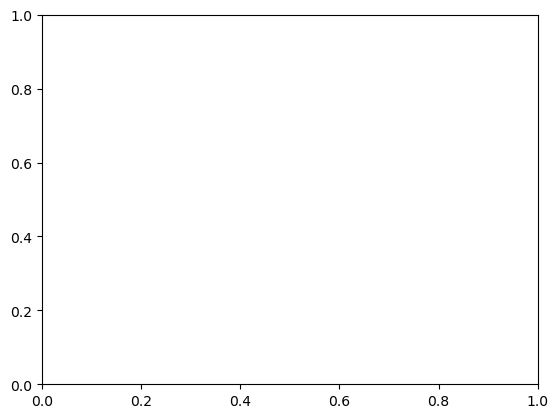

In [22]:
# Create a function for plotting 

# This function needs to be fixed

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
    plt.grid()
    plt.tight_layout
    plt.show()

    plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [9]:
 from sklearn.metrics import classification_report
   
# Score Training Data Set
y_true = y_train
y_pred = lda_for_classification.predict(X_train)
target_names = y.unique()
print('Training REPORT')
print(classification_report(y_true, y_pred, target_names=target_names))

# Score Validation Data Set
y_true = y_test
y_pred = lda_for_classification.predict(X_test)
target_names = y.unique()
print('Validation REPORT')
print(classification_report(y_true, y_pred, target_names=target_names))

Training REPORT
              precision    recall  f1-score   support

    S_macrop       0.92      0.92      0.92        25
    S_nepale       0.88      0.88      0.88         8
    S_raraen       0.98      0.98      0.98        50
    S_progra       1.00      1.00      1.00        18
    S_richar       0.98      0.98      0.98        57

    accuracy                           0.97       158
   macro avg       0.95      0.95      0.95       158
weighted avg       0.97      0.97      0.97       158

Validation REPORT
              precision    recall  f1-score   support

    S_macrop       0.72      0.88      0.79        57
    S_nepale       0.38      0.47      0.42        19
    S_raraen       0.94      0.86      0.89       118
    S_progra       0.81      0.73      0.77        41
    S_richar       0.94      0.92      0.93       135

    accuracy                           0.85       370
   macro avg       0.76      0.77      0.76       370
weighted avg       0.86      0.85      0.85

In [10]:
# Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# with out shrinkage
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']

model = LDA()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
search.fit(X_train, y_train)



Mean Accuracy: 0.917
Config: {'solver': 'svd'}


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [11]:
GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [12]:
grid = dict()
grid['solver'] = [ 'lsqr', 'eigen']
grid['shrinkage'] = np.arange(0, 1, 0.01)
model = LDA()

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
search.fit(X_train, y_train)

Mean Accuracy: 0.918
Config: {'shrinkage': 0.02, 'solver': 'lsqr'}


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'solver': ['lsqr', 'eigen']},
             scoring='accuracy')

AttributeError: 'numpy.ndarray' object has no attribute 'decision_function'